/tmp/ipython-input-788521994.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Figure 1B rows: 1249
    s_prime
0  6.511618
1 -8.278387
2 -5.616299
3  4.728608
4  6.525938


/tmp/ipython-input-788521994.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Figure 1A rows: 1249


/tmp/ipython-input-788521994.py:76: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


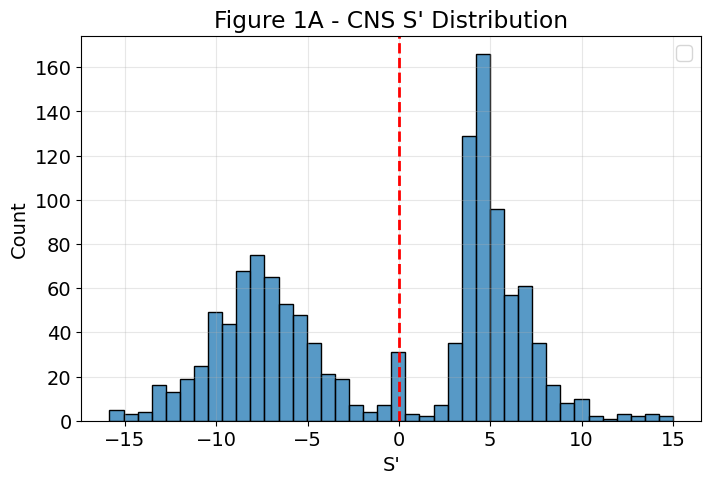

/tmp/ipython-input-788521994.py:94: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


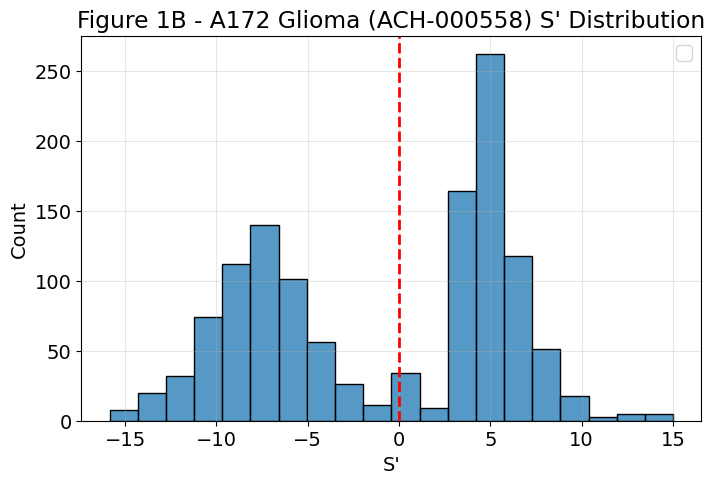

In [2]:
!pip install psycopg[binary]

import pandas as pd
import psycopg
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import psycopg
import matplotlib.pyplot as plt
import seaborn as sns


DB_PARAMS = {
    "dbname":
    "user":
    "password":
    "host":
    "port":
}

def run_query(query: str) -> pd.DataFrame:
    with psycopg.connect(**DB_PARAMS) as conn:
        df = pd.read_sql(query, conn)
    return df

#  Fetching CNS S' for Figure 1A
q_1a = """
WITH parsed AS (
  SELECT
    LEFT(ccle_name, POSITION('_' IN ccle_name) - 1)        AS cell_line,
    SUBSTRING(ccle_name FROM POSITION('_' IN ccle_name)+1) AS tissue,
    s_prime
  FROM public.im_sprime_solved_s_prime
)
SELECT s_prime
FROM public.im_sprime_solved_s_prime
WHERE depmap_id = 'ACH-000558';

"""

# Fetching A172(ACH-000558) S' for Figure 1B
q_1b = """
SELECT s_prime
FROM public.im_sprime_solved_s_prime
WHERE depmap_id = 'ACH-000558';
"""

df_1b = run_query(q_1b)
print("Figure 1B rows:", len(df_1b))
print(df_1b.head())

# checking data presence
if len(df_1b) == 0:
    raise ValueError("S' not existing for ACH-000558")






df_1a = run_query(q_1a)
print("Figure 1A rows:", len(df_1a))

# Figure 1A
plt.rcParams.update({"font.size": 14})

plt.figure(figsize=(8, 5))
sns.histplot(df_1a["s_prime"], bins=40)
#median_val = df_1a["s_prime"].median()
plt.axvline(0, color='red', linestyle='--', linewidth=2)

plt.title("Figure 1A - CNS S' Distribution")
plt.xlabel("S'")
plt.ylabel("Count")
plt.legend()
plt.grid(alpha=0.3)
plt.show()






# Figure 1B
plt.figure(figsize=(8, 5))
sns.histplot(df_1b["s_prime"], bins=20)
#median_val_b = df_1b["s_prime"].median()
plt.axvline(0, color='red', linestyle='--', linewidth=2)

plt.title("Figure 1B - A172 Glioma (ACH-000558) S' Distribution")
plt.xlabel("S'")
plt.ylabel("Count")
plt.legend()
plt.grid(alpha=0.3)
plt.show()











